In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
validation_comments = pd.read_csv('validation/Validation Comments - Sheet1.csv')
validation_comments = validation_comments.replace({'Label':{'Good': 1, 'Bad':0}})

prior_comments = pd.read_csv('files/compiled_comments_3_14_2021.csv')
prior_comments['Label'] = prior_comments['action']
prior_comments = prior_comments.drop(['action'], axis = 1)
prior_comments = prior_comments.replace({'Label': {False: 0, True: 1}})

In [3]:
features = ['WholeScore', 'contains_url','no_url_WholeScore',  'WholeScoreNoStop',
            'no_url_or_stops_WholeScore', 'NER_count', 'NER_match', 'length', 'profanity',
            'WordScore', 'adjWordScore', 'no_url_WordScore', 'WordScoreNoStop', 
            'no_url_or_stops_WordScore']

valid_X = validation_comments[features]

prior_X = prior_comments[features]

valid_y = validation_comments['Label']

prior_y = prior_comments['Label']

valid_X_train, valid_X_test, valid_y_train, valid_y_test = train_test_split(valid_X, valid_y, test_size = 0.33, random_state=random.randint(0, 1000))
prior_X_train, prior_X_test, prior_y_train, prior_y_test = train_test_split(prior_X, prior_y, test_size = 0.33, random_state=random.randint(0, 1000))

X_train = valid_X_train.append(prior_X_train, ignore_index = True)
y_train = valid_y_train.append(prior_y_train, ignore_index = True)

X_test = valid_X_test.append(prior_X_test, ignore_index = True)
y_test = valid_y_test.append(prior_y_test, ignore_index = True)



test = validation_comments.drop(train.index)
test = test.reset_index()

prior_test = prior_comments.sample(n = 2489)
prior_test = prior_test.reset_index()
prior_rest = prior_comments.drop(prior_test.index)
prior_rest = prior_comments.reset_index()

test = test.append(prior_test, ignore_index = True)

#'WordScore', 'adjWordScore', 'no_url_WordScore', 'WordScoreNoStop', 'no_url_or_stops_WordScore', 
features = ['WholeScore', 'contains_url','no_url_WholeScore',  'WholeScoreNoStop',
            'no_url_or_stops_WholeScore', 'NER_count', 'NER_match', 'length', 'profanity',
            'WordScore', 'adjWordScore', 'no_url_WordScore', 'WordScoreNoStop', 
            'no_url_or_stops_WordScore']
X_train = train.drop('Label', axis = 1)

X_train = X_train[features]
y_train = train['Label']

X_test = test.drop('Label', axis = 1)
X_test = X_test[['WholeScore', 'contains_url','no_url_WholeScore',  'WholeScoreNoStop',
                 'no_url_or_stops_WholeScore', 'NER_count', 'NER_match', 'length', 'profanity',
                 'WordScore', 'adjWordScore', 'no_url_WordScore', 'WordScoreNoStop', 
                 'no_url_or_stops_WordScore']]
y_test = test['Label']

X_unlabeled = prior_rest.drop('Label', axis = 1)
X_unlabeled = X_unlabeled[['WholeScore', 'contains_url','no_url_WholeScore',  'WholeScoreNoStop',
                           'no_url_or_stops_WholeScore', 'NER_count', 'NER_match', 'length', 'profanity',
                           'WordScore', 'adjWordScore', 'no_url_WordScore', 'WordScoreNoStop', 
                           'no_url_or_stops_WordScore']]

In [4]:
print(f"X_train dimensions: {X_train.shape}")
print(f"y_train dimensions: {y_train.shape}\n")

print(f"X_test dimensions: {X_test.shape}")
print(f"y_test dimensions: {y_test.shape}\n")

X_train dimensions: (7109, 14)
y_train dimensions: (7109,)

X_test dimensions: (3503, 14)
y_test dimensions: (3503,)



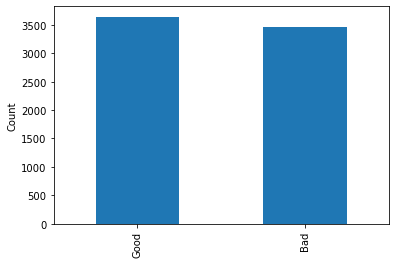

In [5]:
y_train.value_counts().plot(kind='bar')
plt.xticks([0,1], ['Good', 'Bad'])
plt.ylabel('Count');

# Initial model using validation data

Train accuracy Score: 0.7390631593754395
Test accuracy Score: 0.7322295175563802
Train f1 Score: 0.7305737109658679
Test f1 Score: 0.7273255813953488


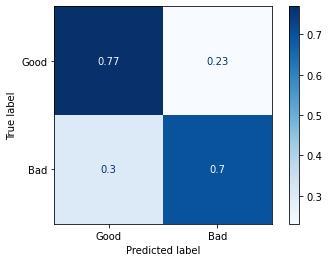

In [6]:
clf = LogisticRegression(max_iter=1000)

clf.fit(X_train, y_train)

y_hat_test = clf.predict(X_test)
y_hat_train = clf.predict(X_train)

train_acc = accuracy_score(y_train, y_hat_train)
test_acc = accuracy_score(y_test, y_hat_test)
train_f1 = f1_score(y_train, y_hat_train)
test_f1 = f1_score(y_test, y_hat_test)

print(f"Train accuracy Score: {train_acc}")
print(f"Test accuracy Score: {test_acc}")
print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")

plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', normalize='true',
                     display_labels=['Good', 'Bad']);

Train accuracy Score: 0.6226415094339622
Test accuracy Score: 0.6935544666415379
Train f1 Score: 0.4117647058823529
Test f1 Score: 0.7009930121368151

# doing random forest

Validation f1 Score: 0.5106382978723405
Test f1 Score: 0.812591938805531
Test acc Score: 0.8114268798105387


(0.5106382978723405, 0.812591938805531)

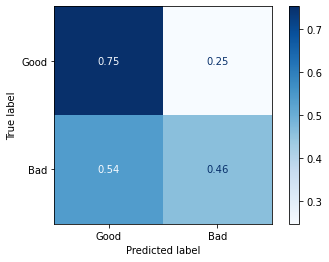

In [12]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest Classifier
def random_forest_class_func(valid_df, prior_df, feature_list, target_name, num_multiple, test_size, estimators):
    #set up training and testing split
    valid_X = valid_df[features]

    prior_X = prior_df[features]

    valid_y = valid_df['Label']

    prior_y = prior_df['Label']

    valid_X_train, valid_X_test, valid_y_train, valid_y_test = train_test_split(valid_X, valid_y, test_size = 0.33, random_state=random.randint(0, 1000))
    
    X_train, X_test, y_train, y_test = train_test_split(prior_X, prior_y, test_size = 0.33, random_state=random.randint(0, 1000))
    
    for i in range(1,num_multiple):
        X_train = X_train.append(valid_X_train, ignore_index = True)
        y_train = y_train.append(valid_y_train, ignore_index = True)

        X_test = X_test.append(valid_X_test, ignore_index = True)
        y_test = y_test.append(valid_y_test, ignore_index = True)

    #fit ridge classifier to x and y training set
    clf = RandomForestClassifier(n_estimators = estimators).fit(X_train, y_train)
    
    importances = clf.feature_importances_
    
    #Predict with ridge classifier on x and y testing set
    y_val = clf.predict(X_test)
    
    y_hat_test = clf.predict(X_test)
    y_hat_train = clf.predict(X_train)
    
    plot_confusion_matrix(clf, valid_X_test, valid_y_test, cmap='Blues', normalize='true',
                     display_labels=['Good', 'Bad']);
    
    y_valid_hat_test = clf.predict(valid_X_test)
    valid_f1 = f1_score(valid_y_test, y_valid_hat_test)
    print(f"Validation f1 Score: {valid_f1}")
    #clf = RandomForestClassifier(n_estimators = estimators).fit(valid_X_train, valid_y_train)
    #valid_y_hat_test = clf.predict(valid_X_test)
    
    #report the correct percentage of predictions
    test_f1 = f1_score(y_test, y_hat_test)
    test_acc = accuracy_score(y_test,y_hat_test)
    
    #valid_f1 = f1_score(valid_y_test, valid_y_hat_test)
    print(f"Test f1 Score: {test_f1}")
    print(f"Test acc Score: {test_acc}")
    #print(f"Validation f1 Score: {valid_f1}")
    
    
    #plt.barh(feature_list, importances)
    #plt.title('Feature importance of random forest classifier with test_size=' + str(test_size))
    
    return valid_f1, test_f1

features = ['WholeScore', 'contains_url','no_url_WholeScore',  'WholeScoreNoStop',
            'no_url_or_stops_WholeScore', 'NER_count', 'NER_match', 'length', 'profanity',
            'WordScore', 'adjWordScore', 'no_url_WordScore', 'WordScoreNoStop', 
            'no_url_or_stops_WordScore']
test = random_forest_class_func(validation_comments, prior_comments, features, 'Label', 1, 0.1, 1000)
test

Validation f1 Score: 0.4691358024691358
Test f1 Score: 0.8151308304891922
Test acc Score: 0.8075784487862641
Validation f1 Score: 0.5476190476190476
Test f1 Score: 0.8039160839160839
Test acc Score: 0.7998858121610048
Validation f1 Score: 0.47916666666666663
Test f1 Score: 0.801948051948052
Test acc Score: 0.7982359426681367
Validation f1 Score: 0.5
Test f1 Score: 0.7875920084121978
Test acc Score: 0.7847055688782307
Validation f1 Score: 0.6732673267326733
Test f1 Score: 0.8046914839367669
Test acc Score: 0.8024755028365137
Validation f1 Score: 0.45238095238095233
Test f1 Score: 0.7786063255335561
Test acc Score: 0.7849113165126156
Validation f1 Score: 0.5567010309278351
Test f1 Score: 0.7922424242424243
Test acc Score: 0.7923934108527132
Validation f1 Score: 0.48837209302325585
Test f1 Score: 0.7577854671280277
Test acc Score: 0.7695744180578415
Validation f1 Score: 0.4782608695652174
Test f1 Score: 0.7469707769066286
Test acc Score: 0.7567382366377341


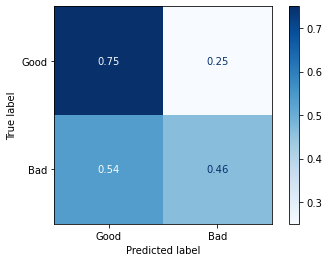

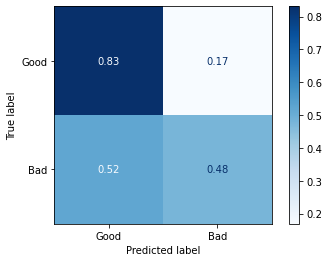

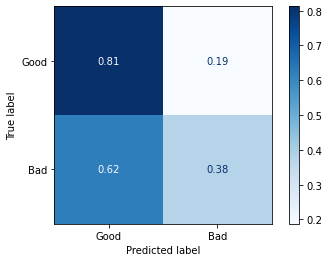

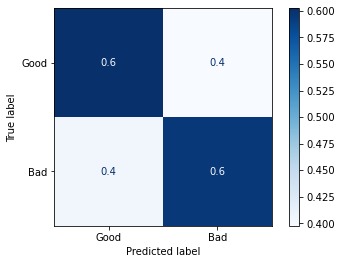

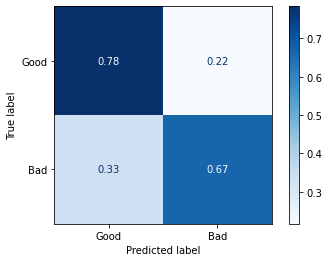

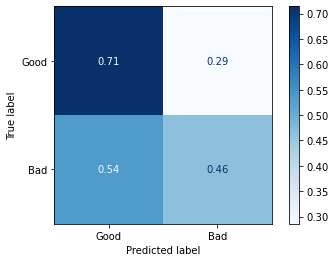

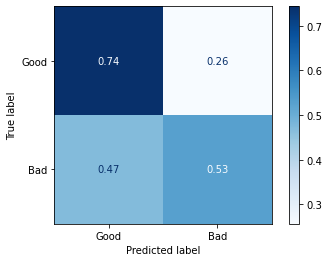

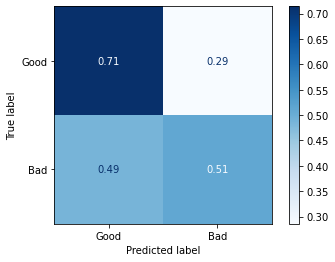

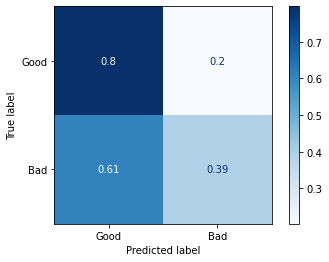

In [20]:
validationf1s = []
testf1s = []
for i in range(1,10):
    valid, test = random_forest_class_func(validation_comments, prior_comments, features, 'Label', i, 0.1, 1000)
    validationf1s.append(valid)
    testf1s.append(test)


In [14]:
validationf1s

[0.3561643835616438,
 0.5957446808510639,
 0.5420560747663551,
 0.5510204081632653,
 0.6526315789473683,
 0.5714285714285714,
 0.5436893203883495,
 0.6391752577319587,
 0.5904761904761905]

In [15]:
testf1s

[0.8141745894554883,
 0.8104318564217612,
 0.7861271676300579,
 0.7970283894932343,
 0.8014803066349458,
 0.7842543527630583,
 0.7881294089029433,
 0.7799616490891659,
 0.7693376563223715]

Looks like repeating 5 validation set 5 times creates good balance of overall test f1 score, and validation specific f1 scores